# Analysis of FRI Data Using Python

Data used: "5wines0720.csv"

Wines used were (total of 10 separate targets): 
- Beaujolais
- Cabernet
- Merlot
- Pinot Noir
- Shiraz
- Zinfandels: 'Zinfandel BS', 'Zinfandel BT', 'Zinfandel C', 'Zinfandel R', 'Zinfandel SV' (different brands)

Sensor array: 
- combination of two peptides, three dyes, measured at three different wavelengths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn # module from the book by A. Mueller and S. Guido, Intro to Machine Learning with Python

In [2]:
data = pd.read_csv("5wines0720.csv") # loading data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 19 columns):
Unnamed: 0     80 non-null object
SEL1-BN 430    80 non-null float64
RN8-BN 430     80 non-null float64
SEL1-PC 430    80 non-null float64
RN8-PC 430     80 non-null float64
SEL1-CC 430    80 non-null float64
RN8-CC 430     80 non-null float64
SEL1-BN 444    80 non-null float64
RN8-BN 444     80 non-null float64
SEL1-PC 444    80 non-null float64
RN8-PC 444     80 non-null float64
SEL1-CC 444    80 non-null float64
RN8-CC 444     80 non-null float64
SEL1-BN 560    80 non-null float64
RN8-BN 560     80 non-null float64
SEL1-PC 560    80 non-null float64
RN8-PC 560     80 non-null float64
SEL1-CC 560    80 non-null float64
RN8-CC 560     80 non-null float64
dtypes: float64(18), object(1)
memory usage: 12.0+ KB


In [4]:
data.head

<bound method NDFrame.head of       Unnamed: 0  SEL1-BN 430  RN8-BN 430  SEL1-PC 430  RN8-PC 430  \
0     Beaujolais       0.0829      0.0823       0.4011      0.4234   
1     Beaujolais       0.0817      0.0837       0.4054      0.4270   
2     Beaujolais       0.0826      0.0915       0.4109      0.4332   
3     Beaujolais       0.0818      0.0887       0.3983      0.4352   
4     Beaujolais       0.0814      0.0858       0.4043      0.4348   
5     Beaujolais       0.0827      0.0835       0.4048      0.4348   
6     Beaujolais       0.0811      0.0815       0.4039      0.4346   
7     Beaujolais       0.0815      0.0820       0.3977      0.4337   
8       Cabernet       0.0720      0.0710       0.5138      0.4960   
9       Cabernet       0.0718      0.0705       0.5088      0.5009   
10      Cabernet       0.0701      0.0704       0.5170      0.5017   
11      Cabernet       0.0705      0.0702       0.5028      0.5004   
12      Cabernet       0.0691      0.0701       0.4999      

In [5]:
data.shape

(80, 19)

In [6]:
datanp = np.array(data.iloc[:, 1:]) # conversion of dataset to NumPy array

In [7]:
target = np.array(data.iloc[:,0]) # conversion of targets to NumPy array

In [8]:
target_unique = np.unique(target) # Just to see what are the targets
target_unique

array(['Beaujolais', 'Cabernet', 'Merlot', 'Pinot Noir', 'Shiraz',
       'Zinfandel BS', 'Zinfandel BT', 'Zinfandel C', 'Zinfandel R',
       'Zinfandel SV'], dtype=object)

In [9]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_num = le.fit_transform(target)
target_num_unique = np.unique(target_num)
print(target_num_unique) # A total of 10 targets, see wines used, above.

[0 1 2 3 4 5 6 7 8 9]


In [10]:
data.columns # The sensors used. 

Index(['Unnamed: 0', 'SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430',
       'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444', 'SEL1-PC 444',
       'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444', 'SEL1-BN 560', 'RN8-BN 560',
       'SEL1-PC 560', 'RN8-PC 560', 'SEL1-CC 560', 'RN8-CC 560'],
      dtype='object')

In [11]:
# Conversion of sensors (features) to NumPy array
features = np.array(['SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430',
       'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444', 'SEL1-PC 444',
       'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444', 'SEL1-BN 560', 'RN8-BN 560',
       'SEL1-PC 560', 'RN8-PC 560', 'SEL1-CC 560', 'RN8-CC 560'])

In [16]:
features

array(['SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430',
       'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444',
       'SEL1-PC 444', 'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444',
       'SEL1-BN 560', 'RN8-BN 560', 'SEL1-PC 560', 'RN8-PC 560',
       'SEL1-CC 560', 'RN8-CC 560'],
      dtype='<U11')

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datanp)
X_scaled.shape

(80, 18)

In [13]:
target.shape

(80,)

## Principal component analysis (PCA) using scaled data

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

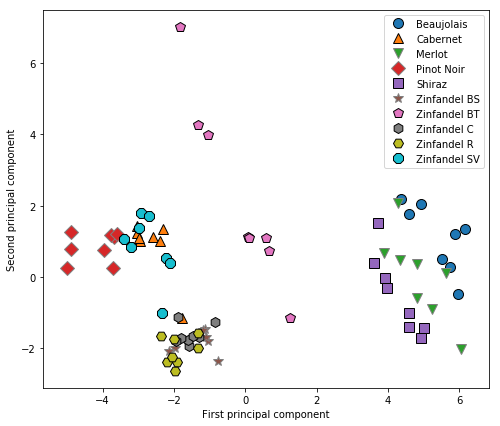

In [16]:
# Plotting F1 vs F2 scores
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], target)
plt.legend(target_unique, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

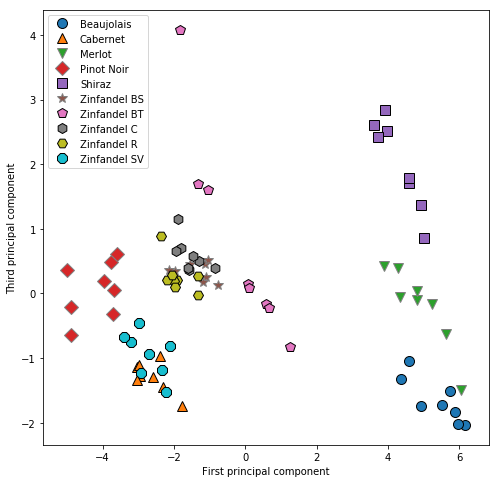

In [17]:
# Plotting F1 vs F3 scores
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Third principal component');

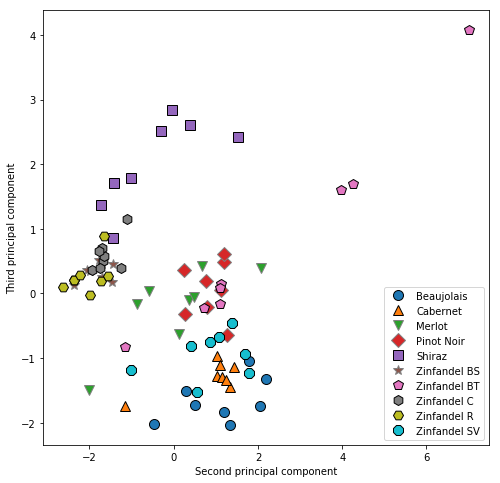

In [18]:
# F2 vs. F3
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,1], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Second principal component')
plt.ylabel('Third principal component');

In [19]:
# Explained variance ratio
pca.explained_variance_ratio_

array([ 0.63631096,  0.16585857,  0.07818067,  0.04753133,  0.0371062 ])

## Principal component analysis of unscaled data

In [25]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(datanp)

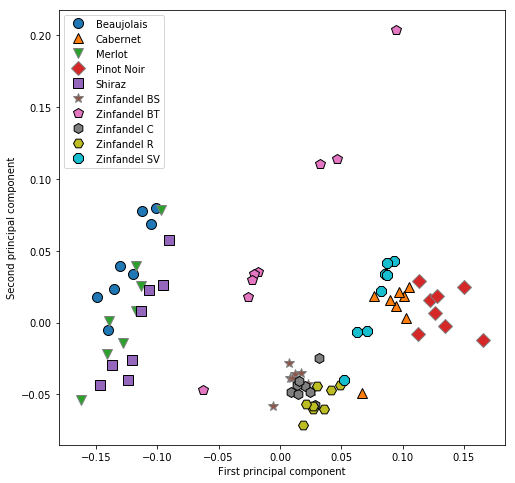

In [26]:
# F1 vs F2
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], target)
plt.legend(target_unique, loc='upper left')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

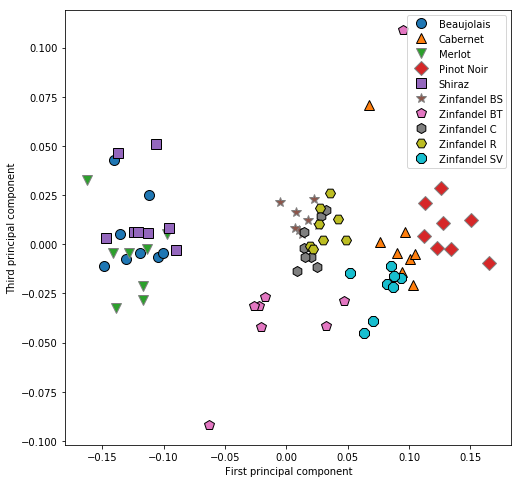

In [27]:
# F1 vs F3
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Third principal component');

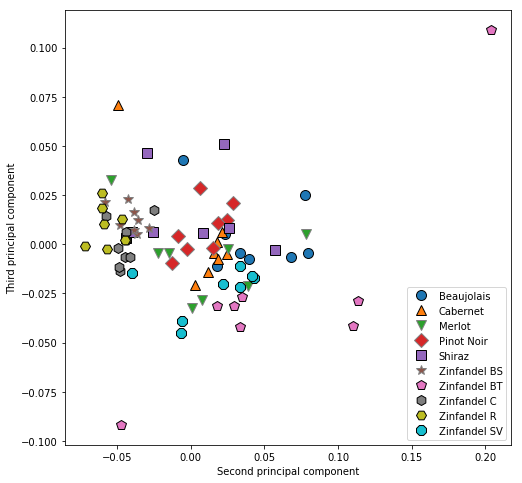

In [28]:
# F2 vs F3
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,1], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Second principal component')
plt.ylabel('Third principal component');

In [29]:
pca.explained_variance_ratio_

array([ 0.70124122,  0.19661026,  0.05858957,  0.02087176,  0.01358011])

# Linear Discriminant Analysis

http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_lda = lda.fit(datanp, target).transform(datanp)

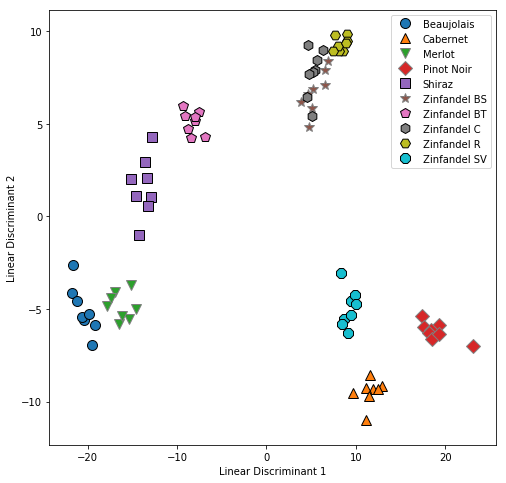

In [22]:
# LD1 vs LD2
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,0], X_lda[:, 1], target)
plt.legend(target_unique, loc='upper right')
#plt.gca().set_aspect('equal')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2');

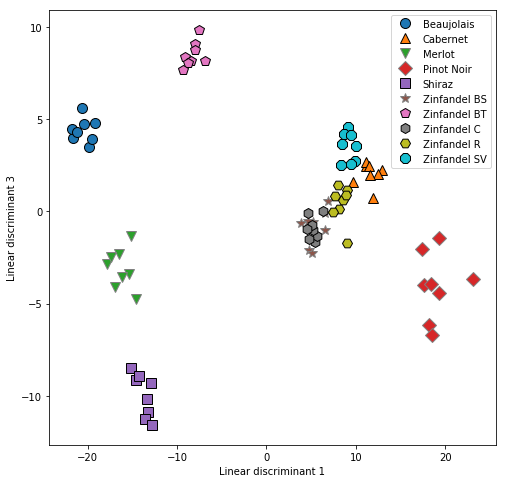

In [23]:
# LD1 vs LD3
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,0], X_lda[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 3');

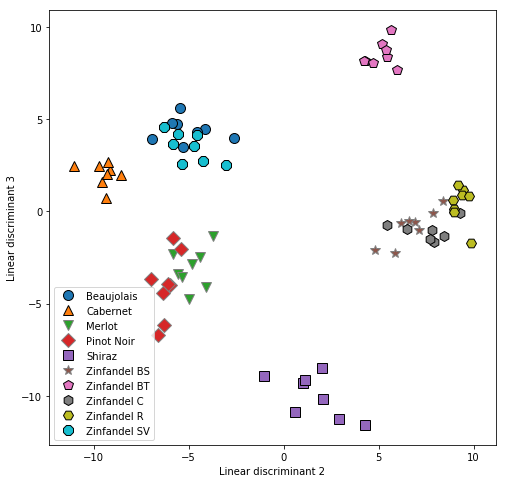

In [24]:
# LD2 vs LD3
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,1], X_lda[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Linear discriminant 2')
plt.ylabel('Linear discriminant 3');

In [36]:
lda.classes_

array(['Beaujolais', 'Cabernet', 'Merlot', 'Pinot Noir', 'Shiraz',
       'Zinfandel BS', 'Zinfandel BT', 'Zinfandel C', 'Zinfandel R',
       'Zinfandel SV'],
      dtype='<U12')

In [37]:
lda.explained_variance_ratio_

array([ 0.67441055,  0.17307036,  0.09636779,  0.02159428,  0.01808395])

### 3D plot

In [38]:
from mpl_toolkits.mplot3d import Axes3D

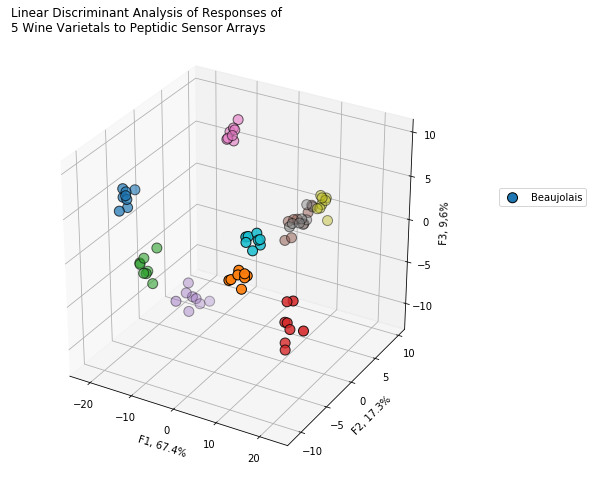

In [39]:
fig = plt.figure(figsize=(8,8), edgecolor='black')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lda[:,0], X_lda[:,1], X_lda[:,2], c=target_num, s=100, edgecolors='black', cmap='tab10')
ax.set_xlabel('F1, 67.4%')
ax.set_ylabel('F2, 17.3%')
ax.set_zlabel('F3, 9,6%')
ax.set_title("Linear Discriminant Analysis of Responses of \n5 Wine Varietals to Peptidic Sensor Arrays", loc='left')
ax.legend(target_unique, loc='lower right', bbox_to_anchor=(1.3,0.6))
plt.show()

### From scratch

In [40]:
import matplotlib as mpl

In [41]:
current_cycler = mpl.rcParams['axes.prop_cycle']

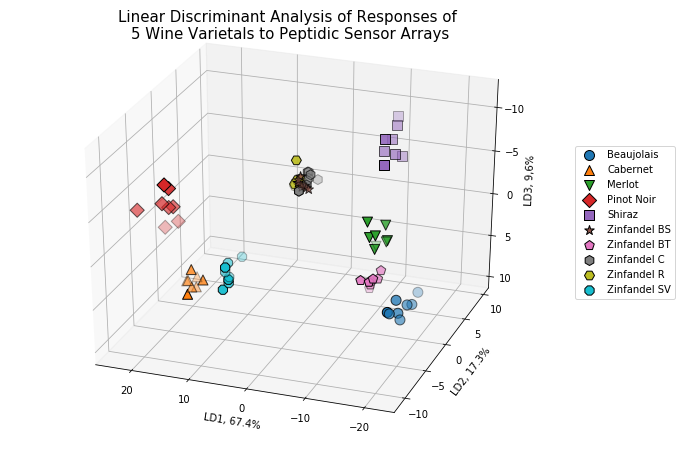

In [43]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.view_init(azim=70, elev=-150)
markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>']
row=0
num = 8
for i, (label, color_) in enumerate(zip(np.unique(target), current_cycler())):
    ax.scatter(X_lda[row:row+num,0], X_lda[row:row+num,1], X_lda[row:row+num,2], s=100, 
               color=color_['color'], label=label, edgecolors='black', marker=markers[i])
    row+=num
    
plt.legend(bbox_to_anchor=(1.2,0.7))
ax.set_xlabel('LD1, 67.4%')
ax.set_ylabel('LD2, 17.3%')
ax.set_zlabel('LD3, 9,6%')
ax.set_title("Linear Discriminant Analysis of Responses of \n5 Wine Varietals to Peptidic Sensor Arrays", fontdict={'fontsize': 15}, loc='center')
ax.view_init(azim=70, elev=-150)
plt.show()